<a href="https://colab.research.google.com/github/tomandcharliegoonanadventure/University-Creations/blob/main/Large_Language_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Set the path to the assignment folder in GDrive
from google.colab import drive

try:
  drive.mount('/content/gdrive')
except:
  print("Load the drive manually from the left panel first. Then run this again,")
  pathBase="/content/drive/MyDrive/"

Mounted at /content/gdrive


In [ ]:
#Import necessary Python libraries
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv("/content/gdrive/MyDrive/diabetes.csv")#do not change this line. Make sure diabetes.csv file is at content/gdrive/MyDrive/


In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(dataset.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
print(dataset.shape)

(768, 9)


<Axes: >

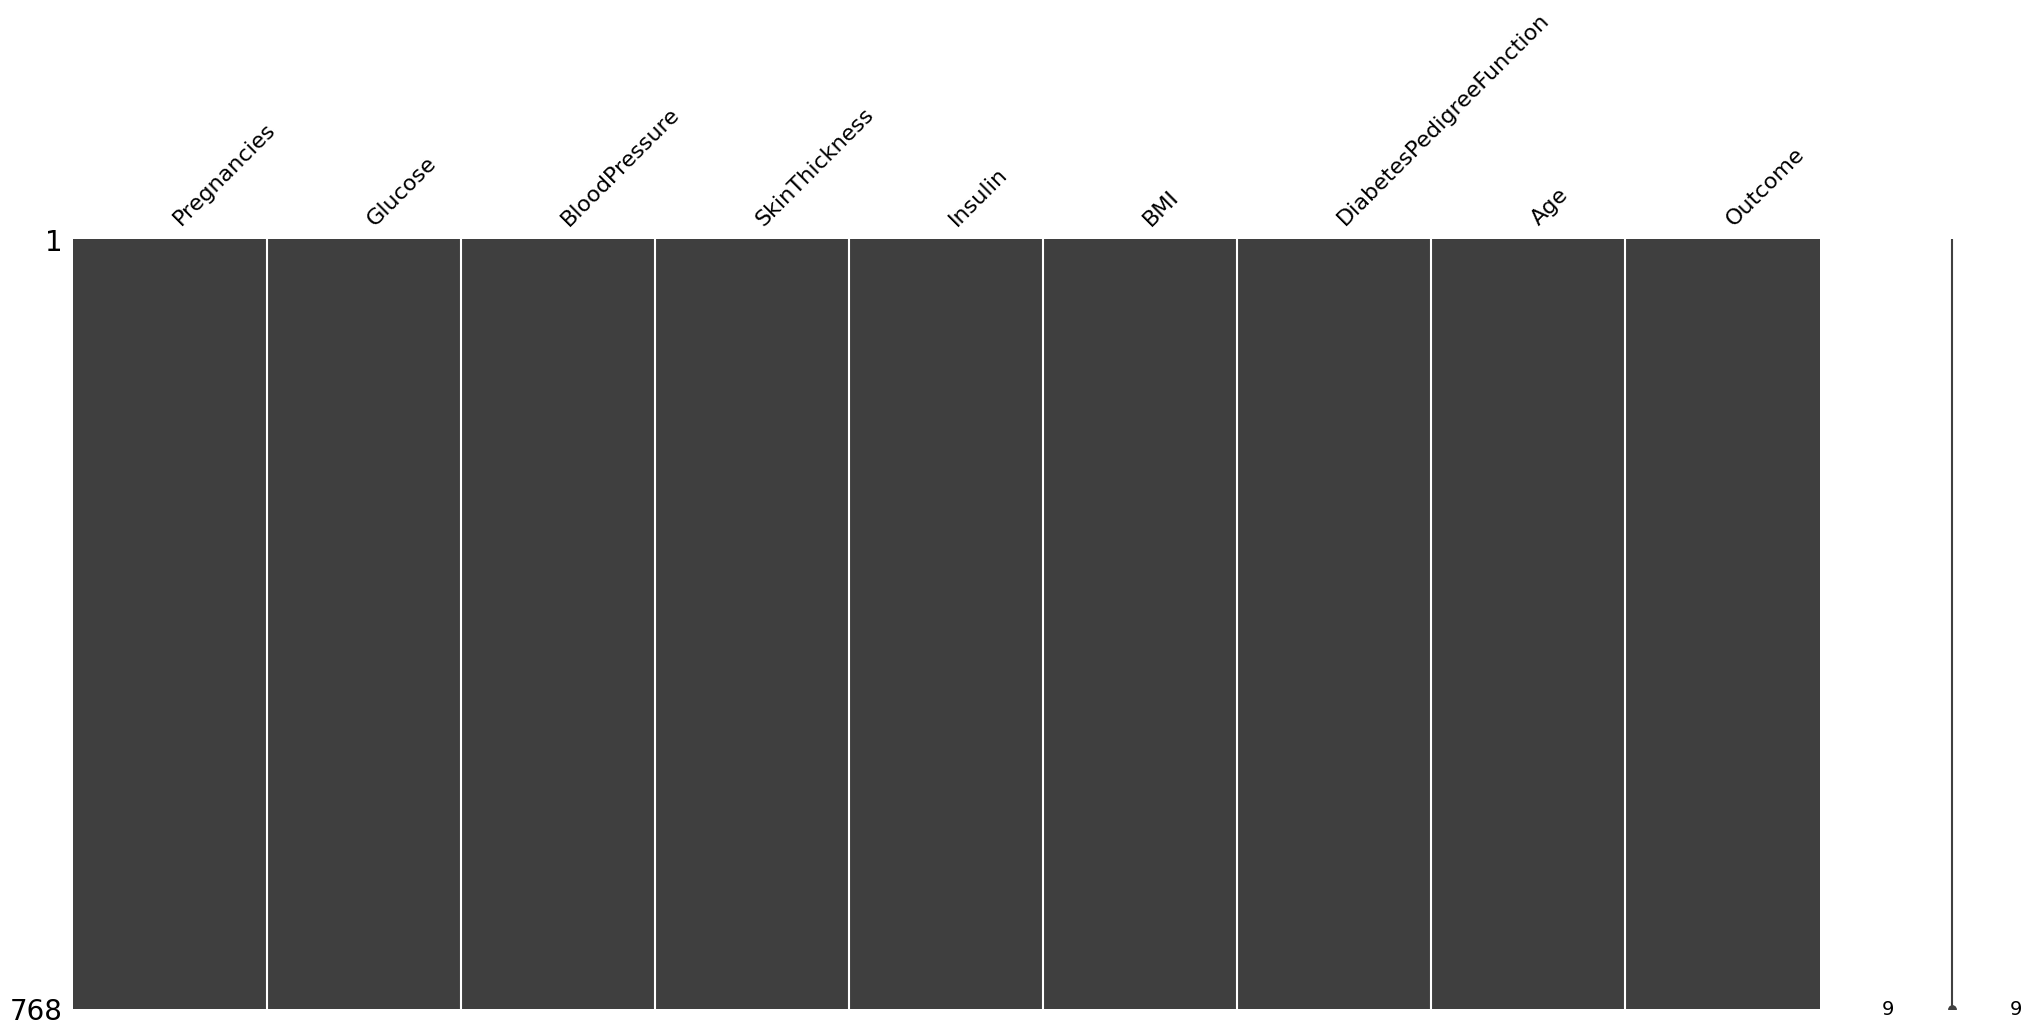

In [ ]:
msno.matrix(dataset)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Splitting the Dataset

# Getting Features and Labels
X = dataset.iloc[:,:8]
y = dataset.iloc[:,8:9]
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
# Splitting the Dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Below is to test if the split worked!
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 499 to 684
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    int64  
 1   Glucose                   691 non-null    int64  
 2   BloodPressure             691 non-null    int64  
 3   SkinThickness             691 non-null    int64  
 4   Insulin                   691 non-null    int64  
 5   BMI                       691 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       691 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.6 KB


In [ ]:
# Data Normalisation Techniques

# Minmax data normalisation
minmax_dataset=(dataset-dataset.min())/(dataset.max()-dataset.min())
minmax_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [ ]:
# Mean Normalisation. These normalisation techniques (above) aren't going to be actually used in the
# model, as they don't feature the data split.
mean_dataset = (dataset-dataset.mean())/dataset.std()
mean_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1.365006
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,-0.731643
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1.365006
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,-0.731643
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1.365006


In [ ]:
X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())
X_test = (X_test-X_test.min())/(X_test.max()-X_test.min())
X_train.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
499,0.352941,0.777778,0.606557,0.323232,0.228132,0.436662,0.324936,0.300000
720,0.235294,0.419192,0.704918,0.191919,0.000000,0.436662,0.102050,0.216667
556,0.058824,0.489899,0.573770,0.404040,0.000000,0.567809,0.059778,0.150000
583,0.470588,0.505051,0.622951,0.000000,0.000000,0.576751,0.047822,0.350000
150,0.058824,0.686869,0.606557,0.505051,0.241135,0.557377,0.137062,0.050000


In [ ]:
#I ran the above code, and the MLP had an accuracy of around 68%. Not bad, but not great.
#I re-ran the MLP using the below normalisation technique, and the accuracy went up to 76%.

X_train = (X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_test.mean())/X_test.std()

In [ ]:
#Now we need to implement multi-layer perceptron. Below is me introducing the MLP and setting
#the conditions for it. Playing with the solver, and aplpha meant that the accuracy went up.
mlp = MLPClassifier(hidden_layer_sizes=(80,30),max_iter=800,solver= 'sgd',alpha=0.0001,random_state=0)

#Training the model. Simple as that. This code takes the MLP that we have set the conditions for,
#and it trains the model using the normalised data from the previous cell.
mlp.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(80, 30), max_iter=800, random_state=0,
              solver='sgd')

In [ ]:
#Now we are using the predict function of Scikitlearn to predict outcomes for the model trained
#in the previous cell. We are using the X_test dataset, and the output will be 0 or 1 based on
#the prediction.
y_pred = mlp.predict(X_test)

#Here we are getting an accuracy score from the predicted outcome from the model. The print
#function allows the computer to output something digestable for us humans - a percentage.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy*100:.2f}%")

Accuracy:88.31%


In [ ]:
#Here we are generating a report on how well the model classified the data. As we can see,
#this model got 18% of the negative cases incorrect. 37% of the positive cases were inaccurate
#as well.
class_report = classification_report(y_test, y_pred)
print("Classification_report Multi-Layer Perceptron:\n", class_report)

Classification_report Multi-Layer Perceptron:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        51
           1       0.87      0.77      0.82        26

    accuracy                           0.88        77
   macro avg       0.88      0.86      0.87        77
weighted avg       0.88      0.88      0.88        77



In [ ]:
#We are going to reintroduce the data split and pre-process the data using ravel.
#The model output suggested it for the y-value, however that doesn't make a lot of sense as the
#y-value is one or the other not scalar. This did actually increase the accuracy of the model
#which is great.
X = dataset.iloc[:,:8]
y = dataset.iloc[:,8:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

np.ravel(X_train)
np.ravel(X_test)
np.ravel(y_train)
np.ravel(y_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
#Using a support vector machine. Below we are starting the SVM up, before training the model with
#our data. Using a Linear Support Vector Machine increased the accuracy of the model. This is
#becuase of the loss function that accompanies each.
clf= svm.LinearSVC(loss='squared_hinge',penalty='l2',verbose=1, max_iter=100000)
clf.fit(X_train,y_train)

[LibLinear]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(max_iter=100000, verbose=1)

In [ ]:
#Now we are creating a prediction dict using test data, then testing the accuracy of the SVM.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy*100:.2f}%")


Accuracy:87.01%


In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification_report Support Vector Machine:\n", class_report)

Classification_report Support Vector Machine:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.86      0.73      0.79        26

    accuracy                           0.87        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.87      0.87      0.87        77



In [ ]:
#Restarting the dataframes fresh. I've done this because the Logistic Regression Classifier in
#SK Learn has an inbuilt algorithm that regularises data. I intend to normalise it
#myself as well and re-run the Log Reg Classifier again to see what happens. What happened was that
#the accuracy decreased. I tried both code below separately. The first one decreased it to
#about 83%, the second decreased it to 76%.
X = dataset.iloc[:,:8]
y = dataset.iloc[:,8:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
#X_train = (X_train-X_train.mean())/X_train.std()
#X_test = (X_test-X_test.mean())/X_test.std()

In [ ]:
#X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())
#X_test = (X_test-X_test.min())/(X_test.max()-X_test.min())

In [ ]:
#I had a play around with the solver, the max iterations and more. lbgfs and newton-cg
#had comparable results, the rest decreased in accuracy.
logclf = LogisticRegression(solver='lbfgs',verbose=1, max_iter=10000)
logclf.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, verbose=1)

In [ ]:
y_pred = logclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy*100:.2f}%")

Accuracy:87.01%


In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification_report Logistic Regression:\n", class_report)

Classification_report Logistic Regression:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.86      0.73      0.79        26

    accuracy                           0.87        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.87      0.87      0.87        77



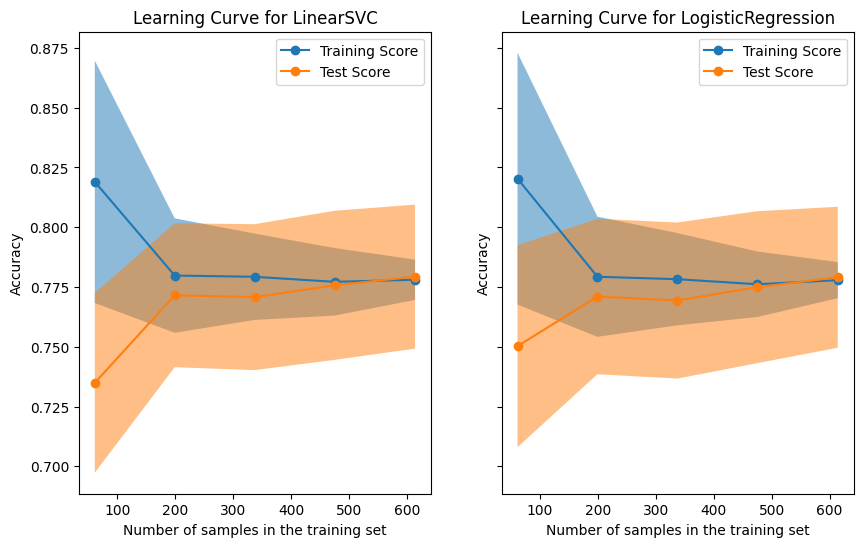

In [ ]:
#Getting the models to have a training time output is not working for the
#Support Vector Machine - The Log Regression gives an output when verbose is on.
#I have chosen to have a look at the Learning Curves instead, which will give an
#indication of training complexity.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([clf, logclf]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

<Axes: >

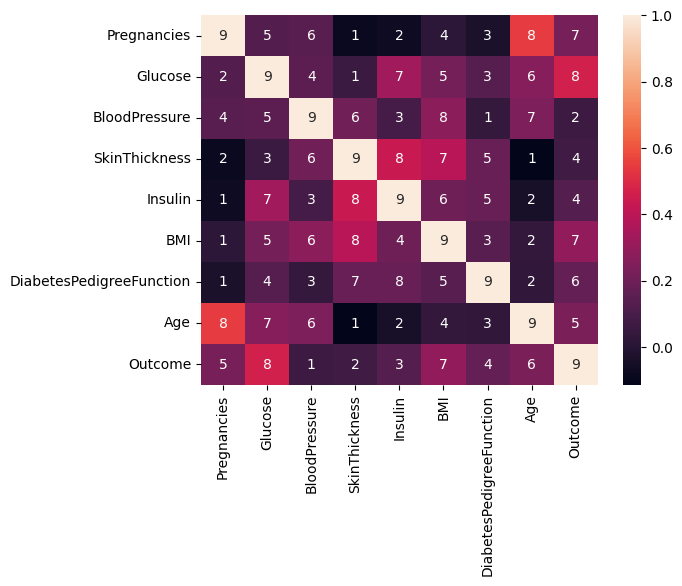

In [ ]:
#I looked at the dataset raw through the heatmap. It created a heatmap that made sense,
#but I don't think it showed real correlation as the data was not normalised.
#Changing the data to mean/stddev didn't change much. I think that it may show
#negative correlation differently.
datacorr = mean_dataset.corr()
sns.heatmap(datacorr,annot=datacorr.rank(axis="columns"))

In [ ]:
#Here we are running a Principle Components Analysis. This will allow us to see the data projected
#onto two dimensions which should allow us to see where most of the correlation is coming from.
pca_diabetes = PCA(n_components=2)
principalComponents_diabetes = pca_diabetes.fit_transform(X)

In [ ]:
#Now we are making a dataframe to put the PCA into so we can look at it.
principal_diabetes_Df = pd.DataFrame(data = principalComponents_diabetes
             , columns = ['principal component 1', 'principal component 2'])
principal_diabetes_Df.head()

,principal component 1,principal component 2
0,-75.714655,35.950783
1,-82.358268,-28.908213
2,-74.630643,67.906496
3,11.077423,-34.898486
4,89.743788,2.746937


In [ ]:
#Now to have a look at how much variability is explained per Principle Component.
#As we can see, 88% of the variability is explained by the
print('Explained variability per principal component:{}'.format(pca_diabetes.explained_variance_ratio_))


Explained variability per principal component:[0.88854663 0.06159078]


In [ ]:
total_var = pca_diabetes.explained_variance_ratio_.sum() * 100

fig = px.scatter(
    principalComponents_diabetes, x=0, y=1, color=dataset['Outcome'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

print("Transformed Training Data Shape", X_train_lda.shape)

print("Transformed Test Data Shape", X_test_lda.shape)

Transformed Training Data Shape (691, 1)
Transformed Test Data Shape (77, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Dimensionality reduction with PCA and FLD
pca = PCA(n_components=2).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

lda = LDA(n_components=1).fit(X_train_pca, y_train)
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

# Train and evaluate Log classifier for PCA
logclf = LogisticRegression(solver='lbfgs',verbose=1, max_iter=10000)
logclf.fit(X_train_pca,y_train)
y_pred = logclf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Principle Component Analysis Accuracy:{accuracy*100:.2f}%")

# Train and evaluate Log classifier for FDA
logclf = LogisticRegression(solver='lbfgs',verbose=1, max_iter=10000)
logclf.fit(X_train_lda,y_train)
y_pred = logclf.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)
print(f"Fisher's Discriminant Analysis Accuracy:{accuracy*100:.2f}%")



Principle Component Analysis Accuracy:75.32%
Fisher's Discriminant Analysis Accuracy:75.32%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


**References**

https://www.slingacademy.com/article/pandas-retrieve-the-first-last-n-rows-of-a-dataframe/#:~:text=To%20view%20the%20first%20N%20rows%20of%20a,New%20York%201%20Jane%20Doe%2022%20Los%20Angeles


https://www.geeksforgeeks.org/machine-learning/python-visualize-missing-values-nan-values-using-missingno-library/


https://www.datacamp.com/tutorial/normalization-in-machine-learning

https://stackoverflow.com/questions/26414913/normalize-columns-of-a-dataframe

https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data

https://www.geeksforgeeks.org/machine-learning/how-to-split-a-dataset-into-train-and-test-sets-using-python/

https://www.geeksforgeeks.org/machine-learning/classification-using-sklearn-multi-layer-perceptron/

https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/

https://www.slingacademy.com/article/handling-scikit-learn-s-dataconversionwarning-column-vector-passed-as-1d-array/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDOneClassSVM.html

https://sklearn.org/stable/auto_examples/svm/plot_svm_scale_c.html#sphx-glr-auto-examples-svm-plot-svm-scale-c-py

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

https://www.geeksforgeeks.org/python/how-to-create-a-seaborn-correlation-heatmap-in-python/

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://www.datacamp.com/tutorial/principal-component-analysis-in-python


https://plotly.com/python/pca-visualization/

https://www.bomberbot.com/machine-learning/a-developers-guide-to-fishers-linear-discriminant-intuition-math-and-python/
